#Normalized Time Vector
Time vector corresponding to Fourier Transform

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.fftpack

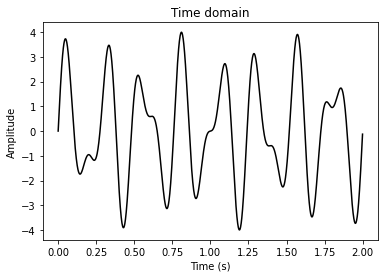

In [0]:
# create the signal
srate  = 1000 # hz
time   = np.arange(0,2*srate)/srate # time vector in seconds
pnts   = len(time) # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time ) + 1.5 * np.sin( 2*np.pi*6.5*time )

# plot signal
plt.plot(time,signal,'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

In [0]:
#prepare the Fourier Transform
fourTime = np.arange(0, pnts)/pnts
fCoefs = np.zeros (len(signal), dtype  = complex)

for fi in range(pnts):

  #Create Complex Sine Wave 
  csw = np.exp(-1j*2*np.pi*fi*fourTime)

  #Compute the Dot Product 
  fCoefs[fi] = sum(signal*csw)/pnts

ampls = 2*abs(fCoefs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


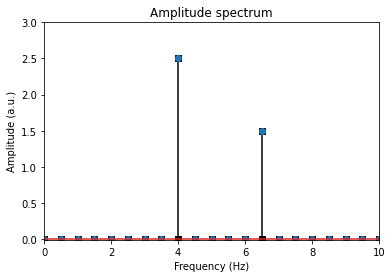

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


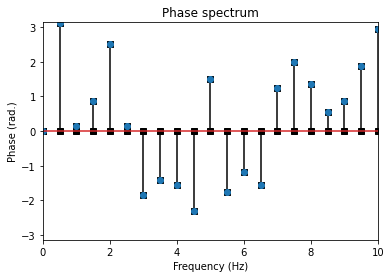

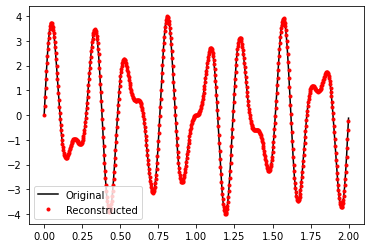

In [0]:
# compute frequencies vector
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)+1))

# plot amplitude
plt.stem(hz,ampls[:len(hz)],'ks-')

# make plot look a bit nicer
plt.xlim([0,10])
plt.ylim([-.01,3])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Amplitude spectrum')
plt.show()


# plot angles
plt.stem(hz,np.angle(fCoefs[:len(hz)]),'ks-')

# make plot look a bit nicer
plt.xlim([0,10])
plt.ylim([-np.pi,np.pi])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (rad.)')
plt.title('Phase spectrum')
plt.show()


# finally, plot reconstructed time series on top of original time series
reconTS = np.real(scipy.fftpack.ifft( fCoefs ))*pnts

plt.plot(time,signal,'k',label='Original')
plt.plot(time[::3],reconTS[::3],'r.',label='Reconstructed')
plt.legend()
plt.show()

The red dots of the reconstructed signal almost match the original signal.